##  Correct Order of Steps for Multiple Linear Regression
#### 1.	Handle duplicates & missing values
#### 2.	Treat outliers (using IQR, capping, or transformations)
#### 3.	Apply Target Variable Transformation (If necessary)
#### 4.	Split data into train & test sets
#### 5.	Apply categorical encoding (Only on training data, then transform test data)
#### 6.	Handle multi-collinearity (VIF check, dropping highly correlated features)
#### 7.	Normalize/Standardize numerical features (Only on training data, then transform test data)
#### 8.	Train Multiple Linear Regression model
#### 9.	Evaluate the model & check assumptions
#### 10.	Apply regularization if necessary (L1/L2)
#### 11.	Make final predictions


In [264]:
################################## Data Analysis & Calculation ##################################
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

############# Skewness
from scipy.stats import skew

## Data Import

In [265]:
electric = pd.read_csv(r"C:\Users\HP\Desktop\Python\Machine Learning\Mini Project\Electric vehicles2\archive (2)\train.csv") 

In [266]:
electric

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64348,EV6357,KNDCE3LG7L,King,SEATTLE,WA,98144.0,2020.0,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,156575107,POINT (-122.30033 47.585339),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,WA,98402.0,2013.0,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,27.0,211048701,POINT (-122.443211 47.252172),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,13.3
64350,EV27852,1G1FX6S05J,King,SEATTLE,WA,98119.0,2018.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,135543411,POINT (-122.367721 47.639264),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),22.857
64351,EV830,WP1AE2A24H,King,SEATTLE,WA,98115.0,2017.0,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,46.0,192459907,POINT (-122.297534 47.685291),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),45.7


## Data Overview
#### VIN (1-10) - The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).
#### County- The county in which the registered owner resides.
#### City - The city in which the registered owner resides.
#### State- The state in which the registered owner resides.
#### ZIP Code - The 5-digit zip code in which the registered owner resides.
#### Model Year - The model year of the vehicle is determined by decoding the Vehicle Identification Number (VIN).
#### Make- The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
#### Model- The model of the vehicle is determined by decoding the Vehicle Identification Number (VIN).
#### Electric Vehicle Type - This distinguishes the vehicle as all-electric or a plug-in hybrid.
#### Clean Alternative Fuel Vehicle (CAFV) Eligibility - This categorizes vehicles as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement.
#### Electric Range - Describes how far a vehicle can travel purely on its electric charge.
#### Base MSRP - This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.
#### Legislative District - The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.
#### DOL Vehicle ID - Unique number assigned to each vehicle by the Department of Licensing for identification purposes.
#### Vehicle Location - The center of the ZIP Code for the registered vehicle.
#### Electric Utility - This is the electric power retail service territory serving the address of the registered vehicle.
#### Expected Price - This is the expected price of the vehicle.

## Data type

In [267]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [268]:
electric['ZIP Code'] = electric['ZIP Code'].astype(str)
electric['Legislative District'] = electric['Legislative District'].astype(str)


In [269]:
electric.describe()

,Model Year,Electric Range,Base MSRP,DOL Vehicle ID
count,64346.000000,64353.000000,64353.000000,6.435300e+04
mean,2018.186212,106.948985,2524.990754,1.972905e+08
std,2.726742,104.093919,12402.895104,1.069466e+08
min,1993.000000,0.000000,0.000000,4.385000e+03
25%,2017.000000,14.000000,0.000000,1.372865e+08
50%,2018.000000,73.000000,0.000000,1.753776e+08
75%,2021.000000,215.000000,0.000000,2.299039e+08
max,2022.000000,337.000000,845000.000000,4.789346e+08


In [270]:
electric['Base MSRP'].value_counts()

0         61263
69900      1062
34600       359
31950       305
28500       148
52900       143
38500       127
32250       113
59900       105
54950       101
39995        79
33950        64
44100        63
36900        56
64950        51
45600        42
36800        40
52650        38
34995        34
55700        31
98950        14
110950       14
53400        14
75095        12
90700        12
102000       11
81100        11
35390         9
184400        9
43700         7
109000        6
89100         5
66300         1
91250         1
32995         1
845000        1
32000         1
Name: Base MSRP, dtype: int64

In [271]:
electric = electric.drop(['ID','DOL Vehicle ID','Base MSRP','VIN (1-10)','Vehicle Location'],axis=1)

## Treatment of null values

In [272]:
electric.isnull().sum()

County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               0
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Legislative District                                   0
Electric Utility                                     722
Expected Price ($1k)                                   0
dtype: int64

In [273]:
electric['Expected Price ($1k)'] = electric['Expected Price ($1k)'].replace('N/',np.nan).astype(float)
electric = electric.dropna(subset=['Expected Price ($1k)'])


In [274]:
electric = electric.fillna(electric.mode().iloc[0])

In [275]:
electric.isnull().sum()

County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Legislative District                                 0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int64

### Outlier treatment using IQR

<AxesSubplot:>

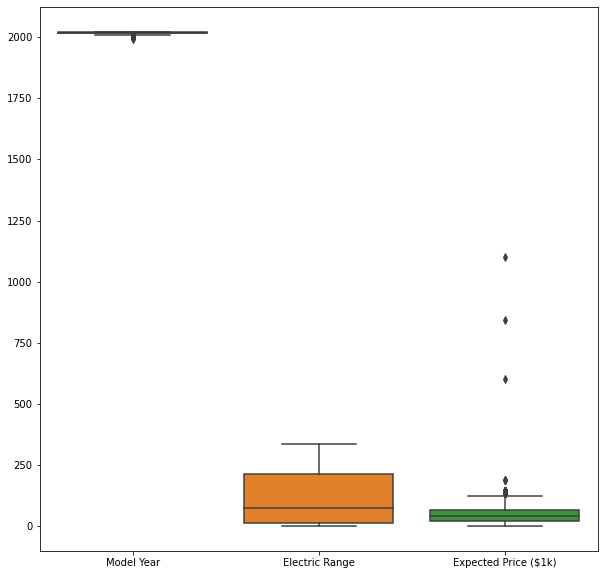

In [276]:
fig, axarr  = plt.subplots(figsize=(10,10))
sns.boxplot(data=electric)

### No outliers are present in 'Electric Range'

## Target Variable Transformation

In [277]:
electric['Expected Price ($1k)'] = np.log1p(electric['Expected Price ($1k)'])

## Splitting the data into training & testing sets.

In [278]:
X = electric.drop(columns=['Expected Price ($1k)'])  # Features
y = electric['Expected Price ($1k)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Treatment of Numerical columns

#### No need to to Standardization or Normalization as we have only 1 Numerical variable ('Electric Range')

## Treatment of Categorical columns

In [279]:
# Categorical Column types:
# County : Nominal, 140 categories
# City: Nominal, 545 Categories
# State: Nominal, 39 Categories
# ZIP Code: Nominal, 679 Categories
# Make: Nominal, 35 Categories
# Model: Nominal, 107 Categories
# Electric Vehicle Type: Nominal, 2 Categories
# Clean Alternative Fuel Vehicle (CAFV) Eligibility: Nominal, 3 Categories
# Legislative District: Nominal, 51 Categories
# Electric Utility: Nominal, 69 Categories

In [280]:
# Here we have 'Electric Vehicle Type' and 'CAFV Eligibility' where we can apply One-Hot Encoding or Dummies.

low_cardinality_features = ['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

X_train = pd.get_dummies(X_train, columns=low_cardinality_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=low_cardinality_features, drop_first=True)

In [281]:
# To all other variables which have higher number of categories, we can apply Target encoding.
import category_encoders
from category_encoders import TargetEncoder
high_cardinality_features = ['County', 'City', 'State', 'ZIP Code', 'Make', 'Model', 'Legislative District', 'Electric Utility']

target_enc = TargetEncoder()
X_train[high_cardinality_features] = target_enc.fit_transform(X_train[high_cardinality_features], y_train)
X_test[high_cardinality_features] = target_enc.transform(X_test[high_cardinality_features])


## Multiple Linear Regression Model building

In [282]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.1365112714759161
RMSE: 0.18898899405879516
R² Score: 0.8865308761729489


## Lets also apply Lasso & Ridge Regularization on our model

In [283]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) 

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Results:")
print(f"MAE: {mae_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R² Score: {r2_lasso}")

Lasso Regression Results:
MAE: 0.23734351530811754
RMSE: 0.2945280617494203
R² Score: 0.7244134402647981


In [284]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1) 

ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Results:")
print(f"MAE: {mae_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R² Score: {r2_ridge}")


Ridge Regression Results:
MAE: 0.1365076778629977
RMSE: 0.18898729659987548
R² Score: 0.8865329144748333


## Let's check the Assumptions on our Multiple linear regression model.

### 1) Linearity

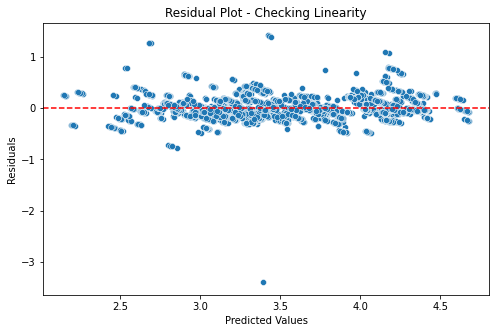

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict values
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Checking Linearity")
plt.show()

#### The residuals are randomly scattered around the zero line, indicating that the linearity assumption is mostly satisfied.

#### There are some minor deviations, but overall, the relationship between predictors and the target appears to be linear.

### 2. Multicollinearity (Already Checked as we have only 1 numerical column)

### 3) Normality of Residuals
#### Residuals should be normally distributed.

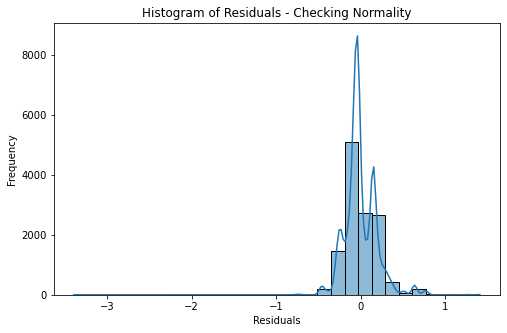

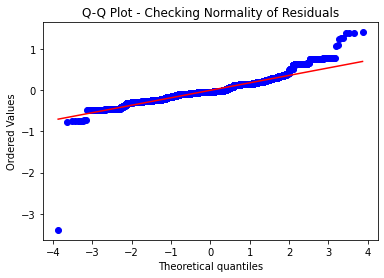

In [286]:
import scipy.stats as stats

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals - Checking Normality")
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot - Checking Normality of Residuals")
plt.show()


#### The histogram of residuals is slightly skewed, suggesting that the residuals are not perfectly normally distributed.

#### The Q-Q plot shows some deviation from the red line, especially in the tails, which suggests that the residuals do not follow a perfect normal distribution.

### 4) Homoscedasticity (Constant Variance of Residuals)
#### Residuals should have constant variance across all levels of X.

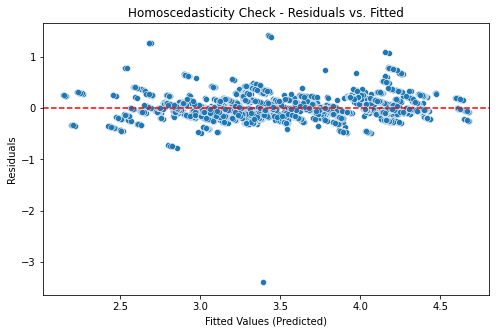

In [287]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check - Residuals vs. Fitted")
plt.show()


#### The residuals appear evenly spread without a clear pattern, suggesting that the assumption of homoscedasticity is largely met.

#### However, there are a few extreme points that could indicate the presence of some heteroscedasticity.

### 5) No Autocorrelation of Residuals
#### Residuals should not be correlated.

In [288]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")


Durbin-Watson Statistic: 1.9930102955622302


#### A Durbin-Watson statistic (Range 0-4), close to 2 suggests that there is no significant autocorrelation in the residuals.

#### Since the value is very close to 2, we can conclude that the independence assumption holds.